In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


ads = pd.read_csv('social_ads.csv')

ads.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
ads2=ads.drop(['User ID'],axis=1)
ads2


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
ads2.duplicated().sum()

20

In [7]:
ads2['Age'].unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54], dtype=int64)

<AxesSubplot: xlabel='Gender', ylabel='count'>

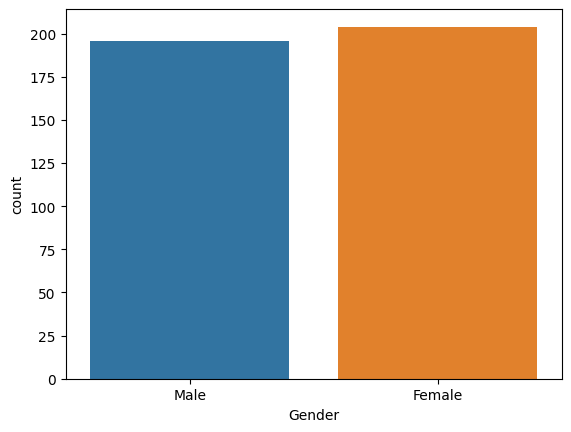

In [8]:
sns.countplot(x='Gender',data=ads2)

In [9]:
ads2.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
ads2.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [11]:
ads2[ads2['Age']<40].groupby(['Gender']).mean()

,Age,EstimatedSalary,Purchased
Gender,,,
Female,30.543103,68025.862069,0.146552
Male,30.672131,66942.622951,0.155738


<AxesSubplot: >

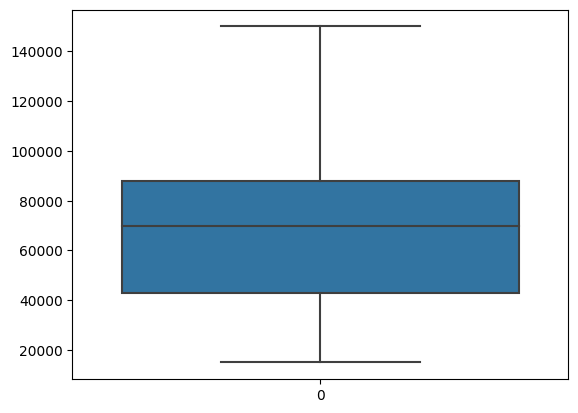

In [12]:
sns.boxplot(ads2['EstimatedSalary'])

In [13]:
ads2.corr()

C:\Users\AI\AppData\Local\Temp\ipykernel_4248\4279571904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ads2.corr()


,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


C:\Users\AI\AppData\Local\Temp\ipykernel_4248\1827764739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ads2.corr(),annot=True)


<AxesSubplot: >

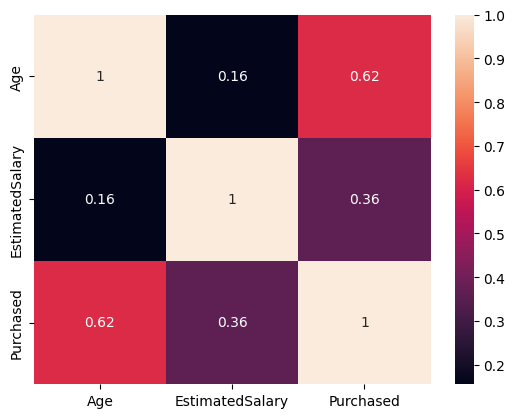

In [14]:
sns.heatmap(ads2.corr(),annot=True)

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'EstimatedSalary'}>],
       [<AxesSubplot: title={'center': 'Purchased'}>, <AxesSubplot: >]],
      dtype=object)

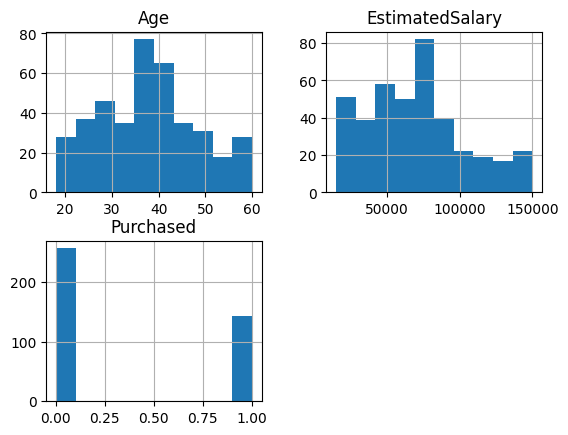

In [15]:
ads2.hist()

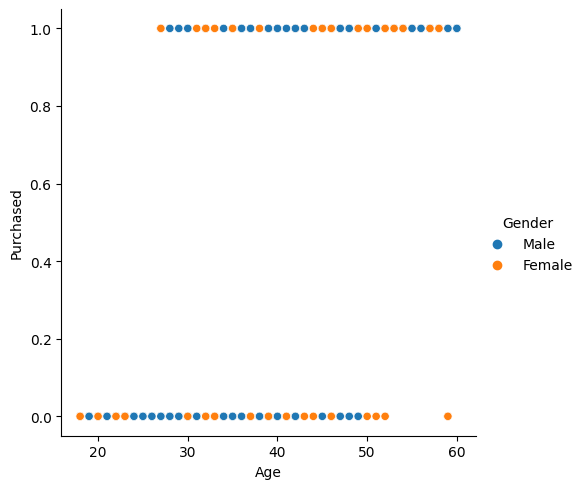

In [16]:
sns.relplot(x='Age',y='Purchased',data=ads2,hue='Gender')

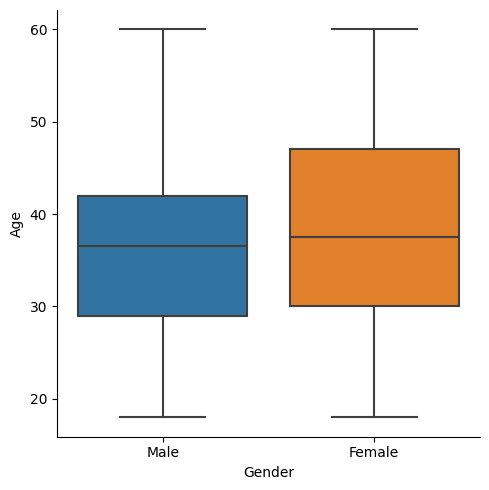

In [17]:
sns.catplot(x='Gender',y='Age',data=ads2,kind='box')

C:\Users\AI\AppData\Local\Temp\ipykernel_4248\2433203767.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ads2['EstimatedSalary'])


<AxesSubplot: xlabel='EstimatedSalary', ylabel='Density'>

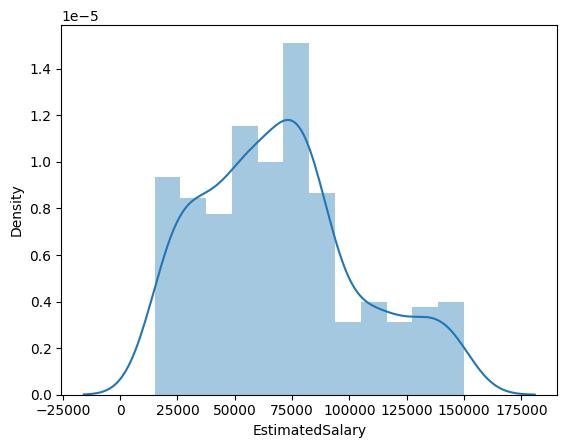

In [18]:
sns.distplot(ads2['EstimatedSalary'])

In [19]:
ads2.nunique()

Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [20]:
ads2.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot: >

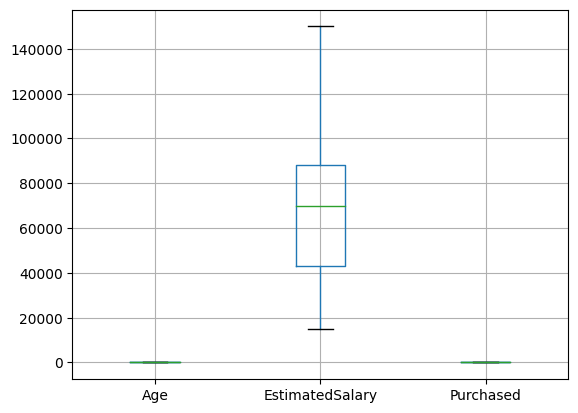

In [21]:
ads2.boxplot()

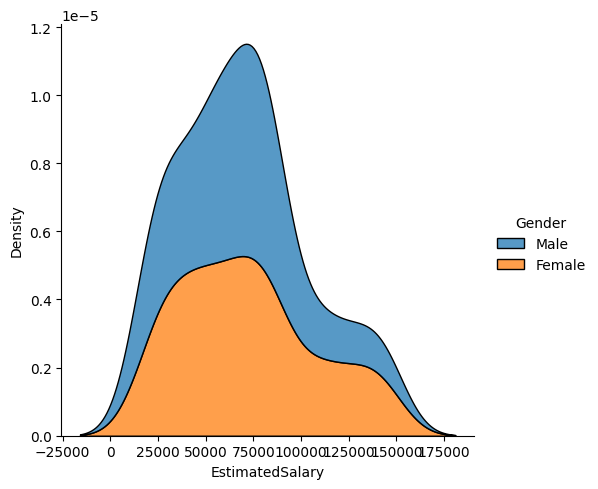

In [68]:
sns.displot(data=ads2, x="EstimatedSalary", hue="Gender",kind="kde", fill=True,multiple="stack")


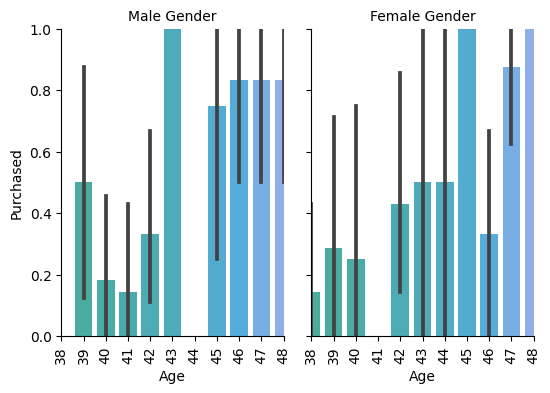

In [82]:
g =sns.catplot(data=ads2, x="Age",y='Purchased',col='Gender',kind="bar",height=4, aspect=.7)

g.set_axis_labels("Age", "Purchased")
g.set_xticklabels(rotation=90)
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.set(xlim=(20,30))